In [2]:
from datetime import datetime, timedelta

from stock_data_repo import StockDataRepo
from backtest import Backtester, BacktestResult
from strategies import MinVarianceAuxiliaryData, min_variance_portfolio

In [3]:
backtester = Backtester(datetime(2020, 2, 1, 0, 0, 0))

In [24]:
FACTOR_HEDGE_CANDIDATES = [
#     "SPXS",
#     "SQQQ",
    "VXX",
]
FACTOR_SHORT_CANDIDATES = [
    "IWF",
    "QQQ",
    "SPY"
]

LONG_CANDIDATES = [
    "AMZN",
    "BABA",
    "BYND",
    "CHWY",
    "COUP",
    "CRSP", 
    "CRWD",
    "CVNA",
    "DDOG",
    "DOCU",
    "FIVN",
    "FRPT",
    "FSLY",
    "HUBS",
    "ISRG",
    "ITB",
    "LULU",
    "MDB",
    "NET",
    "NIO",
    "NVDA",
    "NVTA",
    "OKTA",
    "PBW",
    "PTON",
    "RH",
    "ROKU",
    "SE",
    "SHOP",
    "SNAP",
    "SPOT",
    "SQ",
    "TEAM",
    "TRUP",
    "TTD",
    "TWLO",
    "TXG",
    "UBER",
    "VEEV",
    "W",
    "ZG",
    "ZM",
    "ZS",
] + FACTOR_HEDGE_CANDIDATES
SHORT_CANDIDATES = [
    "AMC", 
    "DAL", 
    "UAL", 
    "WFC", 
    "XOM",
    "CSCO",
    "INTC",
    "DBX",
    "BOX",
    "NLOK",
    "CLDR",
    "IBM",
    "VRSN",
    "MO",
    "PM",
] + FACTOR_SHORT_CANDIDATES
r = backtester.backtest(LONG_CANDIDATES, SHORT_CANDIDATES, min_variance_portfolio)

[*********************100%***********************]  2 of 2 completed


In [25]:

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

cum_returns = (r.returns_history+1).cumprod()
fig.add_trace(go.Scatter(x=cum_returns.index, y=cum_returns), row=1, col=1)
fig.update_yaxes(type="log", row=1, col=1)


for (k, v) in r.allocation_history.items():
    fig.add_trace(go.Scatter(x=r.allocation_history.index, y=v, name=k, stackgroup='one'), row=2, col=1)

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
fig.show()

In [26]:
import plotly.express as px
data = r.allocation_history.iloc[-1]
px.bar(x=data.index, y=data)

Start date,2020-02-03
End date,2020-10-16
Total months,8
,Backtest
Annual return,164.458%
Cumulative returns,100.301%
Annual volatility,17.167%
Sharpe ratio,5.76
Calmar ratio,16.98
Stability,0.98
Max drawdown,-9.687%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.69,2020-03-05,2020-03-16,2020-03-24,14
1,4.37,2020-03-30,2020-04-03,2020-04-13,11
2,2.98,2020-05-22,2020-05-28,2020-06-02,8
3,2.58,2020-02-04,2020-02-05,2020-02-18,11
4,2.55,2020-08-06,2020-08-11,2020-08-17,8


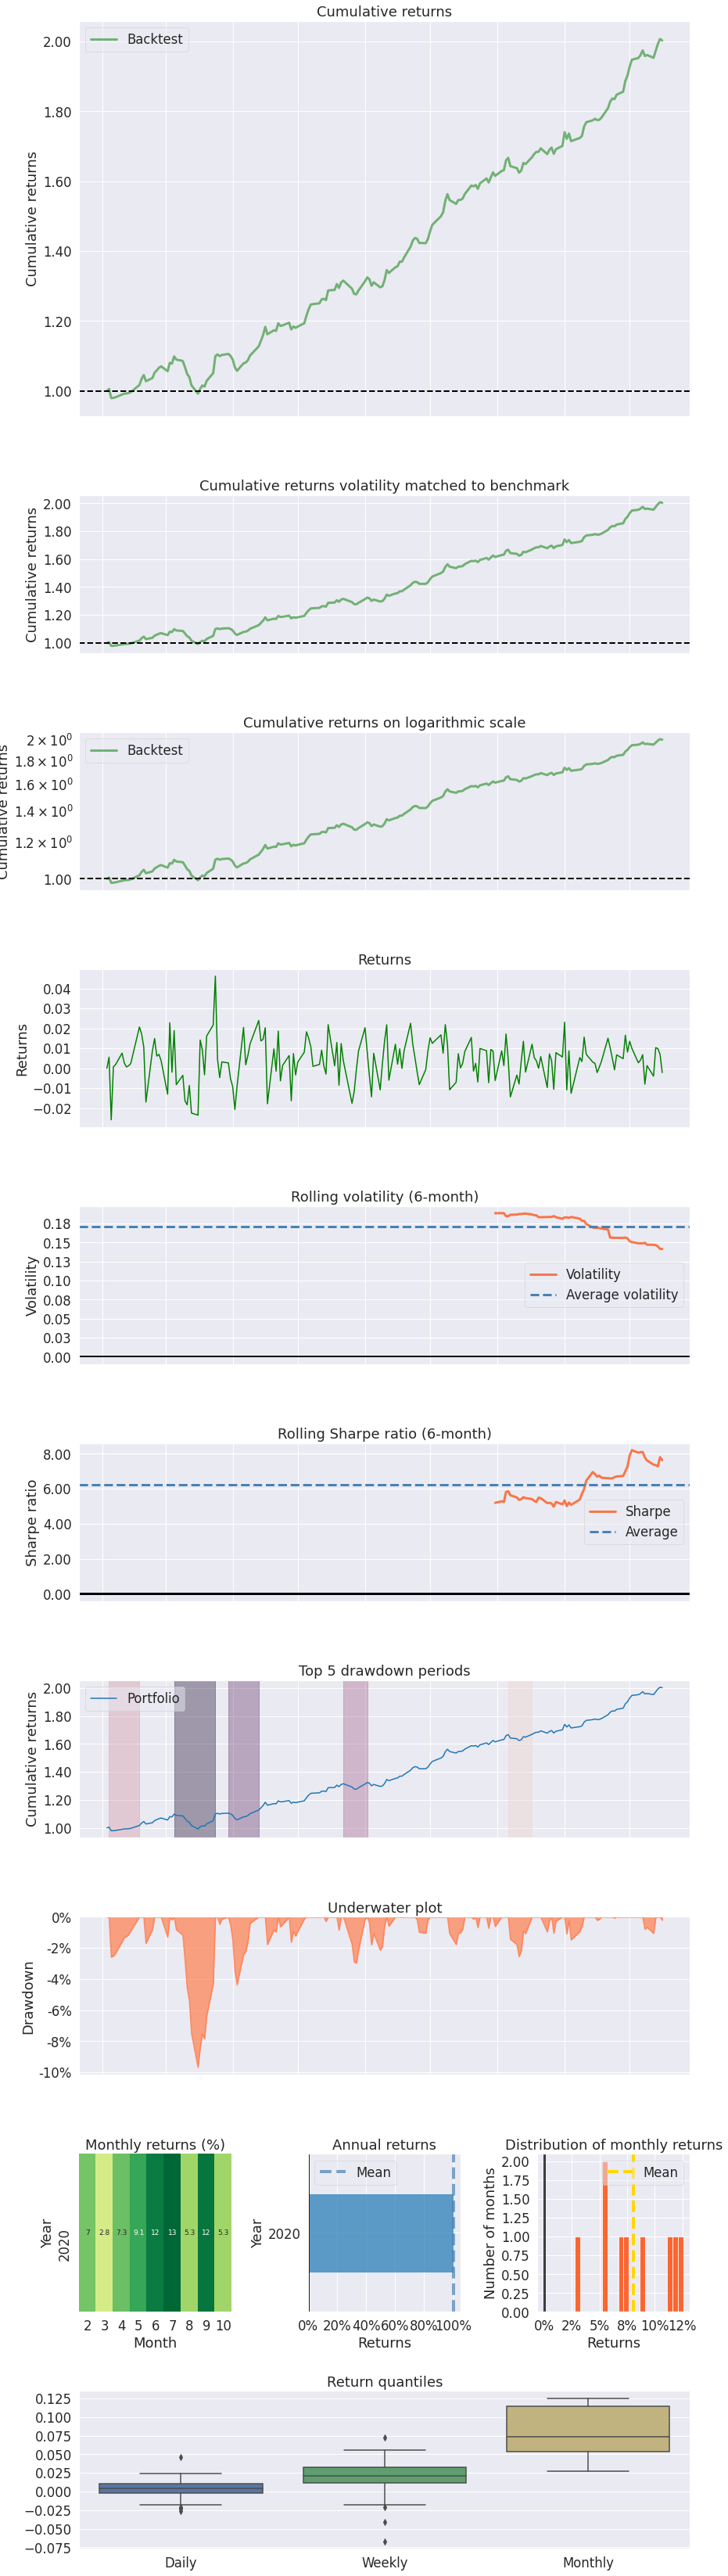

In [27]:
import pyfolio as pf
pf.create_returns_tear_sheet(r.returns_history)


In [ ]:
if True:
    r.save_most_recent_allocation("./allocations/")

In [14]:
if True:
    r.save_most_recent_allocation("./allocations/")